In [ ]:
import librosa
import numpy as np
import os


### Load Audio

In [3]:
sample_wav_path = '../data/iemocap/Session4/sentences/wav/Ses04F_impro01/Ses04F_impro01_F000.wav'
y, sr = librosa.load(sample_wav_path)
print(y.shape)
print(sr)

duration = librosa.get_duration(y=y, sr=sr)
print(duration)

n_samples = len(y)
print(n_samples)


(261953,)
22050
11.879954648526077
261953


In [4]:
from IPython.display import Audio
Audio(sample_wav_path, autoplay=True)


In [5]:
y.max(), y.min(), y.mean(), y.std()


(np.float32(0.42772788),
 np.float32(-0.3909558),
 np.float32(-2.6964653e-05),
 np.float32(0.042797763))

### Waveform Plot 

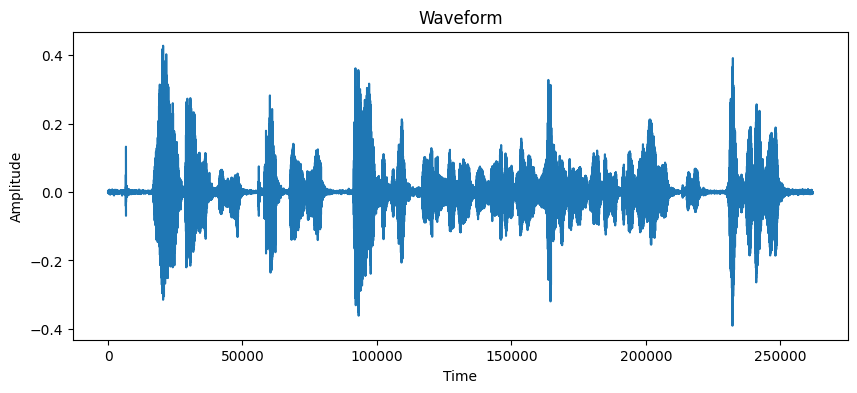

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.plot(y)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()


### Mel-frequency Cepstral Coefficients (MFCCs)

(13, 512)


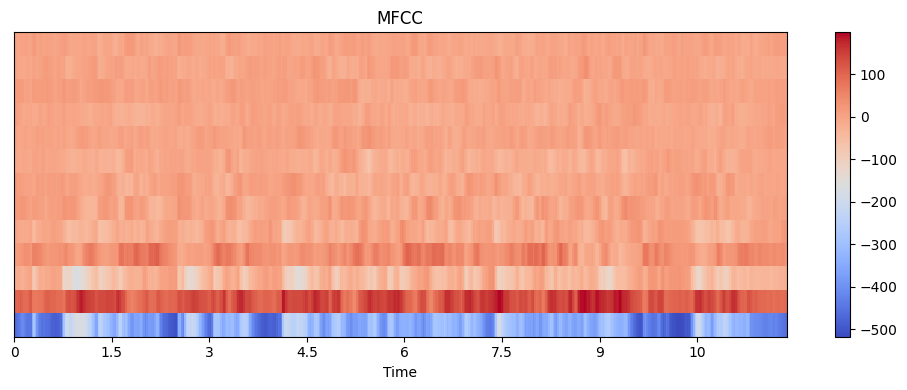

In [7]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
print(mfccs.shape)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()


### Load Transcripts

In [8]:
import pandas as pd
import re
import glob

transcript_path = '../data/iemocap/Session4/dialog/transcriptions/Ses04F_impro01.txt'

def load_transcript(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
    
    transcripts = []
    for line in lines:
        match = re.search(r'(\S+)\s+\[([\d\.\-]+)\]:\s+(.*)', line)
        if match:
            utterance_id = match.group(1)
            time_info = match.group(2)
            text = match.group(3)
            
            time_parts = time_info.split('-')
            start_time = float(time_parts[0])
            end_time = float(time_parts[1]) if len(time_parts) > 1 else None
            
            transcripts.append({
                'utterance_id': utterance_id,
                'start_time': start_time,
                'end_time': end_time,
                'text': text
            })
    
    return pd.DataFrame(transcripts)

transcript_df = load_transcript(transcript_path)
transcript_df.head()


,utterance_id,start_time,end_time,text
0,Ses04F_impro01_F000,4.27,16.15,"Hi. Um, excuse me I've been to, like, five of..."
1,Ses04F_impro01_M000,15.66,20.55,"Uh, lets- What do you need exactly?"
2,Ses04F_impro01_F001,19.78,25.70,Well I filled out all the forms and I've given...
3,Ses04F_impro01_M001,25.28,27.66,"You need a new license, is that what you're te..."
4,Ses04F_impro01_F002,26.89,29.82,Yes. I'm just trying to get a new license.
